<a href="https://colab.research.google.com/github/Nickeniklas/Auto-ARIMA_stock_data/blob/main/auto_arima_stock_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auto ARIMA on stock prices


In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# set fetch data parameters
ticker = "ORCL"
interval = "1mo"
period = "5y"

In [20]:
# fetch the data
data = yf.download(ticker, period=period, interval=interval, keepna=True)

[*********************100%***********************]  1 of 1 completed


In [21]:
originalData = data

In [5]:
data = originalData

In [22]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,ORCL,ORCL,ORCL,ORCL,ORCL
Date,,,,,
2020-07-01,51.493511,53.712978,50.453427,50.787737,274222800
2020-08-01,53.361858,54.508923,50.041895,52.018950,217958300
2020-09-01,55.674648,58.379110,51.170316,53.501750,426654300
2020-10-01,52.326698,57.661020,51.422101,56.112944,209801500
2020-11-01,54.046108,55.319544,52.023593,52.847578,187060500


In [23]:
# set frequency
data = data.asfreq('MS')

In [24]:
# check for NaN values
data.isna().sum()

,,0
Price,Ticker,
Close,ORCL,0
High,ORCL,0
Low,ORCL,0
Open,ORCL,0
Volume,ORCL,0


In [ ]:
# fill NaN
data = data.ffill()

<Axes: xlabel='Date'>

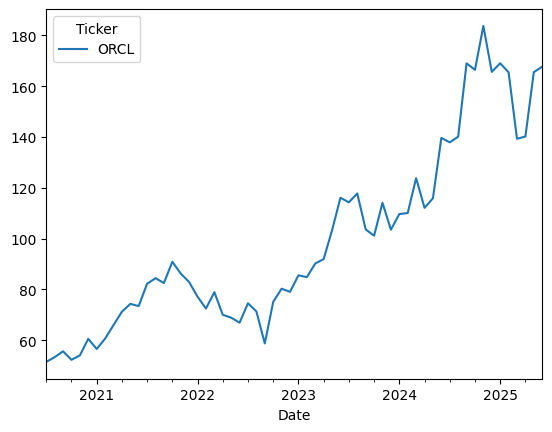

In [25]:
# plot
data.plot(y="Close", use_index=True)

# AUTO-ARIMA

In [3]:
!pip install numpy==1.26.4 pmdarima --force-reinstall --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 100.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 230.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 231.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 289.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 252.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 287.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 237.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 193.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 252.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 245.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 309.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Split data

In [26]:
testSize = 5

In [27]:
train = data['Close'][:-testSize]
test = data['Close'][-testSize:]

In [28]:
from pmdarima.arima import auto_arima
# Fit the auto ARIMA model
stepwise_fit = auto_arima(train, start_p = 0, start_q = 0,
                          max_p = 3, max_q = 3, m = 1,
                          seasonal=False, trace=True,
                          error_action='ignore',
                          suppress_warnings=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=390.994, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=388.928, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=389.101, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=392.266, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=390.783, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=390.861, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=391.852, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=392.130, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.426 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### Forecast

In [29]:
forecast = stepwise_fit.predict(n_periods=testSize)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### Plot Forecast

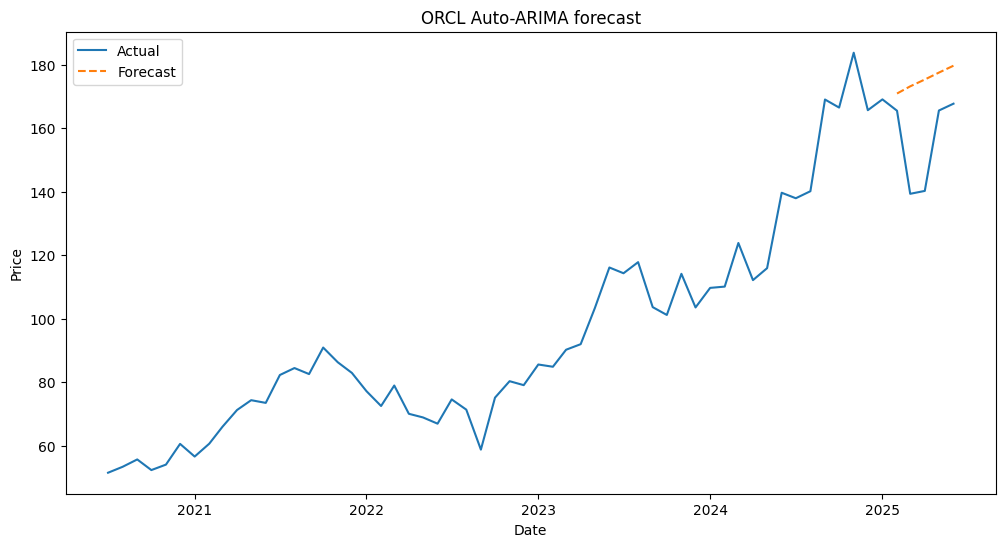

In [30]:
# plot original data for comparison
plt.figure(figsize=(12,6))
plt.title(f"{ticker} Auto-ARIMA forecast")
plt.xlabel("Date")
plt.ylabel("Price")

plt.plot(data.index, data["Close"], label="Actual")
plt.plot(forecast.index, forecast, label="Forecast", linestyle="--")

plt.legend()
plt.show()